# Exploring Swedish macroeconomic data 


Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%pip install matplotlib-venn
from matplotlib_venn import venn2
from statsmodels.tsa.statespace.sarimax import SARIMAX


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

In [2]:
filename = 'data/Bachelor-data.xlsx' # open the file (read)
df = pd.read_excel(filename)
df.rename(columns={'Unnamed: 0':'year'}, inplace = True) # rename the unnamed year column to year (clean)



# Exploring the dataset 

To get a quick overview of the data, we show some **summary statistics** of the data we end up using for the plots and explanations. 

In [10]:
df[['Unemployment rate','Central bank key interest rate','CPI', 'Private consumption, growth','Government consumption, growth','GDP, growth']].describe()

,Unemployment rate,Central bank key interest rate,CPI,"Private consumption, growth","Government consumption, growth","GDP, growth"
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,7.774373,3.835950,0.819862,1.976088,1.116998,2.164594
std,2.152264,4.943223,0.095128,3.002315,2.553622,3.496295
min,1.834398,-0.500000,0.582506,-8.565919,-3.796196,-13.577965
25%,6.586716,0.750000,0.748994,0.311351,-0.366642,0.185637
50%,7.539960,2.900000,0.815023,2.102873,0.915401,2.652260
75%,8.570999,4.250000,0.912874,3.879584,2.606208,4.494419
max,12.423479,40.000000,0.979983,11.857397,14.569112,11.029760


We for example note that the key interest rate ranges from -0.5% to 40%, where 40% seems rather high. We also note that the average growth in GDP is around 2% (2.16%) which is expected. The average growth in private consumption is close to 2% (1.98%). So both GDP and private consumption appears to follow the same trend. 

We start of by creating a Phillips curve for the Swedish economy. Below is the theoretical predection and the actucal Phillips curve.


![alternative text](data/phillips-curve.png)


<AxesSubplot:title={'center':'Swedish Phillips-curve 1990Q1-2020Q1'}, xlabel='Unemployment rate', ylabel='CPI'>

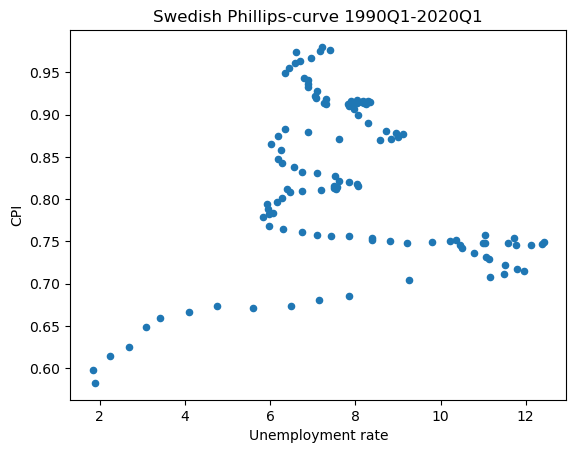

In [4]:
df.plot.scatter(x = 'Unemployment rate', y = 'CPI',title='Swedish Phillips-curve 1990Q1-2020Q1')

It is immediately apperent that the theoretical predictions do not hold empirically. This specific result is well know and relates to the Lucas critique.

# Next we make an interactive plot

In [5]:
# this code is used for skipping quarters in the plots to avoid to many entries on the x-axis
l =[]
for j, i in enumerate(df.year.values):

    if j%4==0 :
        pass
    else:
        i = '' 
    l.append(i)
l = np.array(l)    


In [6]:
# used to ignore a warning in the interactive plot below
import warnings
warnings.filterwarnings('ignore')

In [7]:
# function that takes a dataframe and creates a plot
def _plot_timeseries(dataframe, variable):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    variable = list(variable)
    
    x = dataframe.year.values
    y = dataframe[variable].values
    

    ax.plot(x,y, label = variable)
    if len(variable) != 1:

        title = ' and '.join(variable)
    else:
        title = variable[0]
    ax.set_title(title)
    ax.set_xticklabels(l,rotation= 90)
    ax.legend(loc='upper right')
    plt.show()  

# plots the plots interactivly     
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    variable = widgets.SelectMultiple(
        description='variable', 
        options=['Unemployment rate','Total employment, growth','Central bank key interest rate','CPI','Private consumption, growth','Private final consumption, volume', 'Government consumption, growth', 'Government consumption, volume', 'GDP, growth','GDP, volume, market prices','taxes'], 
        value=['CPI']),
    ); 

Below we make an interactive plot. The plot can take all variables in the dataframe, df. You can choose multiple variables at the same time by using the drop down menu. Choosing multiple values is done by using shift and/or ctrl (or command on mac) + enter.

In [8]:
# call the interactive plot using the dataframe, df.
plot_timeseries(df)

interactive(children=(SelectMultiple(description='variable', index=(3,), options=('Unemployment rate', 'Total …

- Selecting `Private consumption, growth` and `GDP, growth`, it is easy to see that `Private consumption, growth` is pro cyclical. Is is also noted that `GDP` appears more volatile than `private consumption`. This could suggest that consumers wish to smooth out their consumption, i.e. if their income falls by one unit, then their consumption falls by less than one unit.  
- Selecting `central bank key interest rate` and `GDP, growth`, their appears to be some inverse correlation, but is is not very strong. the inverse correlation appears strongest around 1992-1993 and around 2008.
- Selecting `Goverment consumption, growth` and `GDP, growth`. The correlation is not unambiguous. Around 1990 to 1991/92 the correlation appears inverse, same around 2008. Around 1999 and 2018 the co-movement seems strong. 

Some interresting explaination of the above `Unemployment rate`, `interest rate` and `CPI`

# Conclusion

Having Explored the data, we can conclude that the theoretical prediction of the Phillips curve does not hold empirically for Swedish Data. The intution that GDP growth and growth in private consumption does indeed hold, due to the co-movement.